# Premier modèle K-NN

## Base de données, Analyse, Prétraitement

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fonction permettant la création du DataSet
from create_DataSet import create_DataSet 

### Chargement du DataSet

In [2]:
data = create_DataSet() # Chargement du DataSet à partir de la fonction create_DataSet
data.head() # Affichage des 5 premières lignes du DataSet

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,b,c,b,a,1,3.0,2.0,1.0,3.0,10,B
1,a,b,c,a,b,1,3.0,2.0,3.0,1.0,10,B
2,a,b,c,a,b,1,2.0,3.0,1.0,2.0,8,C
3,a,c,a,a,a,2,3.0,2.0,2.0,3.0,10,B
4,a,c,c,b,a,1,NaN,NaN,NaN,3.0,9,C


In [3]:
data.info() # Affichage des informations du DataSet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 9
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              207 non-null    object
 1   Q2              203 non-null    object
 2   Q3              202 non-null    object
 3   Q4              206 non-null    object
 4   Q5              201 non-null    object
 5   Q6              203 non-null    object
 6   Q7              205 non-null    object
 7   Q8              203 non-null    object
 8   Q9              205 non-null    object
 9   Q10             207 non-null    object
 10  Score           215 non-null    int64 
 11  Interpretation  215 non-null    object
dtypes: int64(1), object(11)
memory usage: 21.8+ KB


In [4]:
print(data.shape) # Affichage des dimensions du DataSet

(215, 12)


D'après les informations obtenues ci-dessus on constate que notre DataSet contient des données nulles. Dans la suite de ce NoteBook on va donc traiter le DataSet afin de rectifier les données nulles et données potentiellement éronnées.

## Données erronées

Détermination des données erronées et remplacement par des données nulles. Pour ce faire on cherche donc toutes les valeurs différentes de *a*, *b*, *c*, *1*, *2*, *3*, qui sont les données autorisé dans notre jeux de données. Pour ce faire on peut utilisé deux méthode différentes. La première utilise la fonction *replace()*, combiné avec le paramètre *regex*, et pour la seconde on cherche les éléments précisé avec la fonction *isin()*, ce qui permet d'obtenir un masque composé de booléen, les valeurs false sont ensuite remplacé à l'aide de la fonction *where()*.

In [5]:
# Méthode 1 : utilisation de replace avec un regex
data_test = data.copy() # Création d'une copie du DataSet
data_test.iloc[:,:-2] = data_test.iloc[:,:-2].replace(regex=[r'[^a-c1.0-3.0].*'],value='NaN') # Remplacement des données éronnées par NaN

# data_test.isnull().sum()

In [6]:
# Methode 2 : utilisation de where et isin
data.iloc[:,:-2] = data.iloc[:,:-2].where(data.iloc[:,:-2].isin(['a','b','c',1,2,3])) # Remplacement des données éronnées par NaN

# data.isnull().sum()

## Données manquantes

Maintenant nous allons comptabiliser le nombre de données manquantes.

In [7]:
data.isnull().sum() # Comptabilisation du nombre de données manquantes

Q1                 61
Q2                 50
Q3                 51
Q4                 46
Q5                 51
Q6                149
Q7                167
Q8                131
Q9                117
Q10                93
Score               0
Interpretation      0
dtype: int64

Il a été décidé de remplacer ces données les modes de chaque features, on aurait également pu les remplacer par la valeur *'2'* ou *'b'* qui n'a pas d'impacte dans la comptabilisation du score.

In [8]:
data = data.fillna(data.mode().iloc[0,:]) # Remplacement des NaN par les modes
data.isnull().sum() # Comptabilisation des NaN

Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Q8                0
Q9                0
Q10               0
Score             0
Interpretation    0
dtype: int64

In [9]:
data.iloc[:,:-2] = data.iloc[:,:-2].replace({'a': 1, 'b' : 2, 'c' : 3}).astype("int64")

In [10]:
X = data.iloc[:,:-2].values
Y = data.iloc[:,-1]

## Développement et entraînement d'un modèle KNN

In [11]:
from KNN import *

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

Séparation des données en DataSet de train (*X_train*), et DataSet de test (*X_test*).

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

### KNN From Scratch

In [13]:
modele_scratch = KNN()

In [14]:
modele_scratch.train(X_train, y_train, metric="euclidean")
acc_euclidean = []
for k in range(1, 30+1):
    y_pred = modele_scratch.prediction(X_test, k=k)
    acc_euclidean.append(modele_scratch.accuracy(y_test, y_pred, resume=False)[0])

In [15]:
modele_scratch.train(X_train, y_train, metric="manhattan")
acc_manhattan = []
for k in range(1, 30+1):
    y_pred = modele_scratch.prediction(X_test, k=k)
    acc_manhattan.append(modele_scratch.accuracy(y_test, y_pred, resume=False)[0])

In [16]:
modele_scratch.train(X_train, y_train, metric="minkowski", p=3)
acc_minkowski = []
for k in range(1, 30+1):
    y_pred = modele_scratch.prediction(X_test, k=k)
    acc_minkowski.append(modele_scratch.accuracy(y_test, y_pred, resume=False)[0])

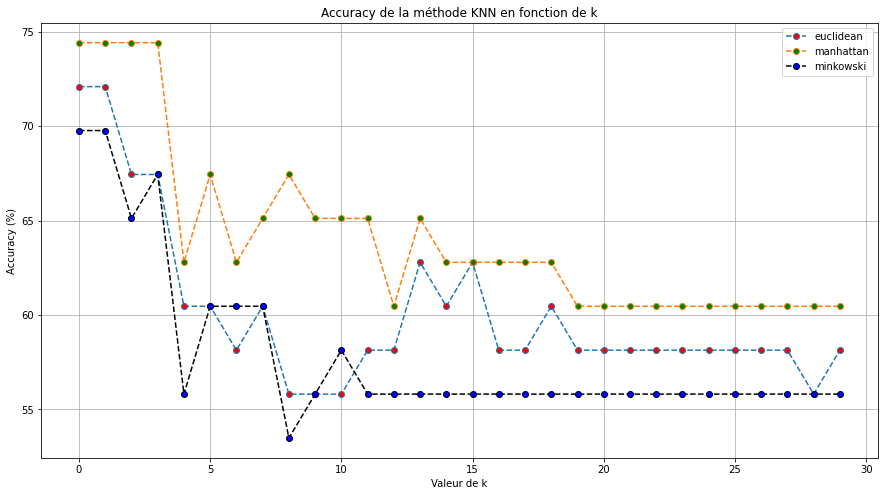

In [39]:
plt.figure(figsize=(15, 8))
plt.plot(acc_euclidean, linestyle='--', marker='o', markerfacecolor='r', label="euclidean")
plt.plot(acc_manhattan, linestyle='--', marker='o', markerfacecolor='g', label="manhattan")
plt.plot(acc_minkowski, 'k', linestyle='--', marker='o', markerfacecolor='b', label="minkowski")
plt.title("Accuracy de la méthode KNN en fonction de k")
plt.xlabel("Valeur de k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
y_pred = modele_scratch.prediction(X_test, k=5)
print(y_pred)

[3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 2 3
 3 3 3 3 2 3]


In [19]:
acc = modele_scratch.accuracy(y_test, y_pred, resume=True)[0]


 ======  Résumé des métrique  =====

----------------------
Matrice de confusion
[[ 0  3  0]
 [ 0  3 14]
 [ 0  2 21]]


Accuracy : 55.81395348837209

Taux d'erreur : 44.18604651162791
----------------------

Précision classe A : nan

Sensibilité classe A : 0.0
----------------------

Précision classe B : 0.375

Sensibilité classe B : 0.17647058823529413
----------------------

Précision classe C : 0.6

Sensibilité classe C : 0.9130434782608695
----------------------




C:\Users\utilisateur\Documents\microsoft_ia\Projets\Premier_modele_K-NN\KNN.py:136: RuntimeWarning: invalid value encountered in longlong_scalars
  P = self.__confusion_matrix[cpt,cpt]/self.__confusion_matrix.sum(axis=0)[cpt]


In [20]:
print(acc)

55.81395348837209


Transformation de toutes les colonnes en _**string**_ afin de pouvoir appliquer _**get_dummies**_ sur toutes les colonnes qualitatives (toutes les colonnes).

In [21]:
print(data.iloc[:,:-2])

    Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10
0    1   2   3   2   1   1   3   2   1    3
1    1   2   3   1   2   1   3   2   3    1
2    1   2   3   1   2   1   2   3   1    2
3    1   3   1   1   1   2   3   2   2    3
4    1   3   3   2   1   1   3   1   1    3
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...
5    3   3   3   3   3   2   3   1   1    3
6    2   1   3   1   2   2   3   1   1    2
7    1   3   2   1   1   2   3   1   1    3
8    1   2   3   1   2   2   3   1   1    1
9    1   2   3   1   1   2   3   1   1    3

[215 rows x 10 columns]


In [22]:
data.iloc[:,:-2] = data.iloc[:,:-2].replace({1 : 'a', 2 : 'b', 3 : 'c'})

In [23]:
print(data.iloc[:,:-2])

   Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10
0   a  b  c  b  a  a  c  b  a   c
1   a  b  c  a  b  a  c  b  c   a
2   a  b  c  a  b  a  b  c  a   b
3   a  c  a  a  a  b  c  b  b   c
4   a  c  c  b  a  a  c  a  a   c
.. .. .. .. .. .. .. .. .. ..  ..
5   c  c  c  c  c  b  c  a  a   c
6   b  a  c  a  b  b  c  a  a   b
7   a  c  b  a  a  b  c  a  a   c
8   a  b  c  a  b  b  c  a  a   a
9   a  b  c  a  a  b  c  a  a   c

[215 rows x 10 columns]


In [24]:
# data.iloc[:,:-2] = data.iloc[:,:-2].astype(str)

Utilisation de la fonction _**get_dummies**_ pour categoriser les variables qualitatives. 

In [25]:
X = pd.get_dummies(data.iloc[:,:-2]).values

In [26]:
Y = data.iloc[:,-1].values

In [27]:
# from KNN import *

# X_train = X[:-1,:]
# X_test = X[-1,:]

# ppv = KNN(X_test, X_train, Y[:-1].reshape(-1), metric="euclidean")

## KNN Sklearn

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

In [29]:
parametres = {
    "n_neighbors" : list(range(1,20+1)),
    # "algorithm" : ["brute"],
    "metric" : ["euclidean", "manhattan", "minkowski"]
}

classifier = GridSearchCV(KNeighborsClassifier(), parametres, cv = 5)

classifier = classifier.fit(X_train, y_train)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [30]:
classifier.best_params_

{'metric': 'euclidean', 'n_neighbors': 8}

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
CM = confusion_matrix(y_test, y_pred)
print(CM)

[[ 0  3  0]
 [ 0 10  7]
 [ 0  3 20]]


In [33]:
TE = (1 - np.trace(CM)/np.sum(CM))*100
Accuracy = 100-TE
P1 = CM[0,0]/CM.sum(axis=0)[0]
R1 = CM[0,0]/CM.sum(axis=1)[0]
P2 = CM[1,1]/CM.sum(axis=0)[1]
R2 = CM[1,1]/CM.sum(axis=1)[1]
P3 = CM[2,2]/CM.sum(axis=0)[2]
R3 = CM[2,2]/CM.sum(axis=1)[2]

print("\n=======================")
print(f"\nTaux d'erreur : {TE}")
print(f"\nAccuracy : {Accuracy}")
print("----------------------")

print(f"\nPrécision classe A : {P1}")
print(f"\nSensibilité classe A : {R1}")
print("----------------------")

print(f"\nPrécision classe B : {P2}")
print(f"\nSensibilité classe B : {R2}")
print("----------------------")

print(f"\nPrécision classe C : {P3}")
print(f"\nSensibilité classe C : {R3}")
print("\n=======================\n")



Taux d'erreur : 30.23255813953488

Accuracy : 69.76744186046511
----------------------

Précision classe A : nan

Sensibilité classe A : 0.0
----------------------

Précision classe B : 0.625

Sensibilité classe B : 0.5882352941176471
----------------------

Précision classe C : 0.7407407407407407

Sensibilité classe C : 0.8695652173913043




C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_16604/3297350612.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  P1 = CM[0,0]/CM.sum(axis=0)[0]


In [34]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(f"Recall = {recall_score(y_test, y_pred, average='micro')}")
print(f"Precision = {precision_score(y_test, y_pred, average='micro')}")

Accuracy = 0.6976744186046512
Recall = 0.6976744186046512
Precision = 0.6976744186046512


In [35]:
from joblib import dump, load

dump(classifier, 'KNN_sklearn.joblib')

['KNN_sklearn.joblib']

In [36]:
toto = load('KNN_sklearn.joblib')
n_predict = toto.predict(X_test)

In [37]:
accuracy_score(y_test, n_predict)

0.6976744186046512

In [38]:
toto.score(X_test, y_test)

0.6976744186046512

### KNN From Sklearn

## Mettre en place la solution dans l'application de test de personnalité